In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
hints = pd.read_csv("HINTS_erdos.csv")

In [3]:
hints.count()
#print(hints.shape)

HHID                3630
PERSONID            3630
Stratum             3630
APP_REGION           259
HIGHSPANLI          3630
                    ... 
AgeDX               3630
TimeSinceDX         3630
smokeStat           3630
PHQ4                3630
IncomeRanges_IMP    3630
Length: 357, dtype: int64

In [4]:
hints =  hints.drop(['APP_REGION', 'PERSONID', 'HHID'], axis=1, inplace=False)

In [5]:
#set all the features with numerical values to integers  and character as categorical

# Convert numerical features to integers
numerical_features = hints.select_dtypes(include=['int64', 'float64']).columns
hints[numerical_features] = hints[numerical_features].astype('int32')

# Convert character features to categorical
character_features = hints.select_dtypes(include=['object']).columns
hints[character_features] = hints[character_features].astype('category')

In [6]:
#turn all values less than 0 to NA in integer type features
hints[numerical_features] = hints[numerical_features].applymap(lambda x: np.nan if x < 0 else x)
hints.head()

,Stratum,HIGHSPANLI,HISPSURNAME,HISP_HH,Treatment_C2,RUC2003,CENSDIV,CENSREG,FormType,Language_Flag,...,EducA,EducB,RaceEthn,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,IncomeRanges_IMP
0,HM,2,2,2,1,1,5,3,2,1,...,3.0,3.0,2.0,5.0,29.0,NaN,NaN,1.0,2.0,7.0
1,LM,2,2,2,1,6,2,1,2,1,...,2.0,2.0,2.0,NaN,27.0,NaN,NaN,2.0,1.0,4.0
2,HM,2,2,2,1,1,3,2,2,1,...,4.0,4.0,5.0,5.0,20.0,NaN,NaN,1.0,2.0,8.0
3,HM,2,2,2,1,1,5,3,2,1,...,4.0,5.0,3.0,5.0,22.0,NaN,NaN,3.0,1.0,9.0
4,HM,2,2,2,1,4,5,3,2,1,...,NaN,NaN,2.0,3.0,28.0,NaN,NaN,3.0,0.0,5.0


## **Data subset on "Your Overall Health"**
*I'm doing on one subset of dataset. This can be done on whole dataset too.*


In [7]:
YourOverallHealth = (["GeneralHealth", "OwnAbilityTakeCareHealth", "MedConditions_Diabetes", "MedConditions_HighBP", "MedConditions_HeartCondition", "MedConditions_LungDisease", "MedConditions_Arthritis", "MedConditions_Depression", "SleepWorkdayHr", "SleepWorkdayMn", "SleepWeekendHr", "SleepWeekendMn", "Height_Feet", "Height_Inches", "Weight", "WeightIntention", "WeightOpinion", "LittleInterest", "Hopeless", "Nervous", "Worrying", "EmotionalSupport", "TalkHealthFriends", "HelpDailyChores"])

In [8]:
hints_YOH = hints[YourOverallHealth]

In [9]:
hints_YOH['EverHadCancer'] = hints.EverHadCancer

/var/folders/pj/smtb5qn15451pgf_1y_gw7k00000gn/T/ipykernel_45059/2939169573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hints_YOH['EverHadCancer'] = hints.EverHadCancer


In [10]:
hints_YOH

,GeneralHealth,OwnAbilityTakeCareHealth,MedConditions_Diabetes,MedConditions_HighBP,MedConditions_HeartCondition,MedConditions_LungDisease,MedConditions_Arthritis,MedConditions_Depression,SleepWorkdayHr,SleepWorkdayMn,...,WeightIntention,WeightOpinion,LittleInterest,Hopeless,Nervous,Worrying,EmotionalSupport,TalkHealthFriends,HelpDailyChores,EverHadCancer
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,7.0,0.0,...,NaN,4.0,4.0,4.0,2.0,4.0,1.0,1.0,1.0,2.0
1,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,6.0,NaN,...,1.0,3.0,4.0,4.0,3.0,4.0,1.0,1.0,1.0,2.0
2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,8.0,0.0,...,2.0,2.0,4.0,4.0,3.0,3.0,1.0,1.0,1.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,0.0,...,1.0,3.0,4.0,4.0,3.0,4.0,1.0,1.0,1.0,2.0
4,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,0.0,...,2.0,2.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,4.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,8.0,0.0,...,4.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0
3626,3.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,8.0,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,2.0
3627,3.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,9.0,0.0,...,1.0,3.0,3.0,4.0,3.0,3.0,2.0,1.0,2.0,2.0
3628,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,0.0,...,4.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0


### **Visualising NAs**

In [11]:
print(hints_YOH.isna().sum())

GeneralHealth                    107
OwnAbilityTakeCareHealth         108
MedConditions_Diabetes           144
MedConditions_HighBP             133
MedConditions_HeartCondition     131
MedConditions_LungDisease        136
MedConditions_Arthritis          138
MedConditions_Depression         133
SleepWorkdayHr                   185
SleepWorkdayMn                  1831
SleepWeekendHr                   216
SleepWeekendMn                  1843
Height_Feet                      148
Height_Inches                      0
Weight                           159
WeightIntention                  381
WeightOpinion                    144
LittleInterest                   183
Hopeless                         199
Nervous                          195
Worrying                         191
EmotionalSupport                 119
TalkHealthFriends                117
HelpDailyChores                  125
EverHadCancer                     31
dtype: int64


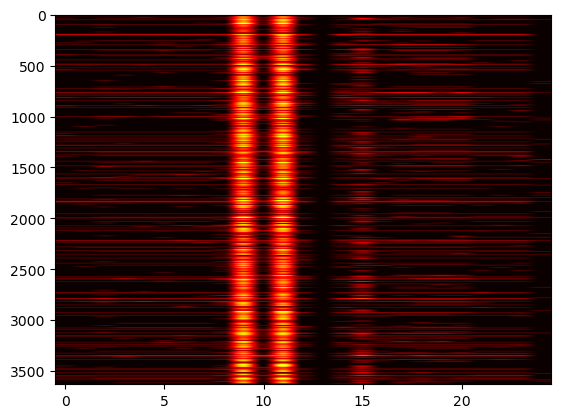

In [12]:
plt.imshow(hints_YOH.isnull(), cmap='hot', aspect='auto')
plt.show()

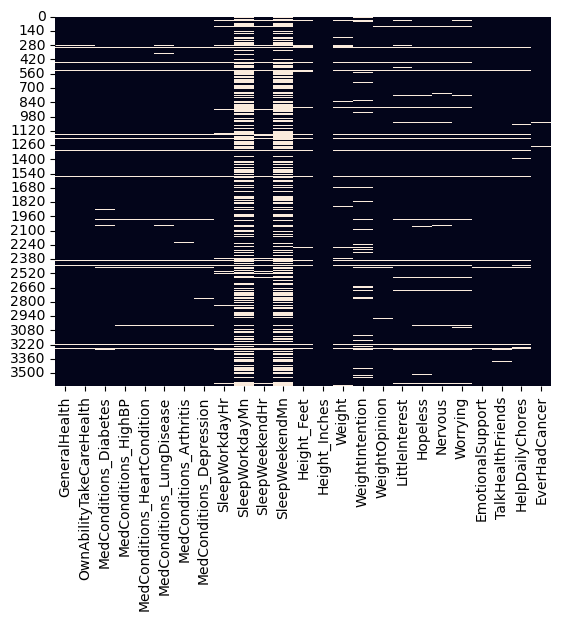

In [13]:
sns.heatmap(hints_YOH.isnull(), cbar=False)
plt.show()

**Removing the colums with high number of missing values**

In [14]:
#hints_YOH.SleepWorkdayMn
print(hints_YOH.SleepWeekendMn.isna().sum())
print(hints_YOH.SleepWorkdayMn.isna().sum())


1843
1831


In [15]:
hints_YOH = hints_YOH.drop(['SleepWorkdayMn', 'SleepWeekendMn'], axis=1, inplace=False)

In [16]:
hints_YOH.shape

(3630, 23)

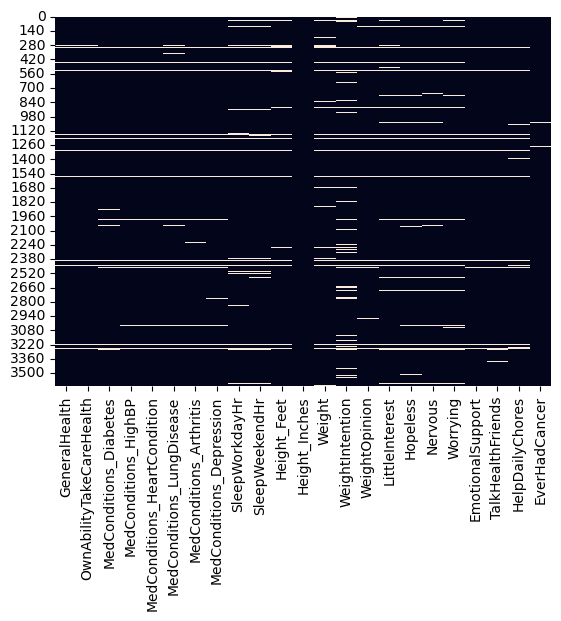

In [17]:
sns.heatmap(hints_YOH.isnull(), cbar=False)
plt.show()

In [18]:
hints_YOH = hints_YOH.dropna()

In [19]:
hints_YOH.shape

(2924, 23)

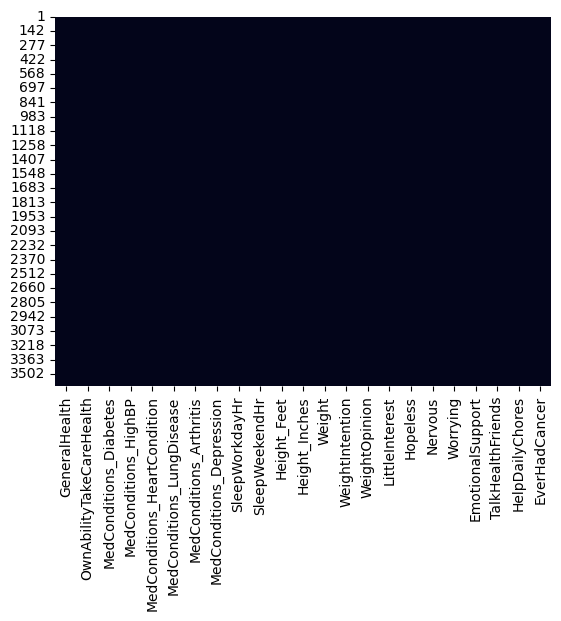

In [20]:
sns.heatmap(hints_YOH.isnull(), cbar=False)
plt.show()

In [21]:
hints_YOH.to_csv("YourOverallHealth.csv")

# **Applying data Cleaning on all the features of hints dataset**

In [22]:
print(hints.isna().sum()>500)

Stratum             False
HIGHSPANLI          False
HISPSURNAME         False
HISP_HH             False
Treatment_C2        False
                    ...  
AgeDX                True
TimeSinceDX          True
smokeStat           False
PHQ4                False
IncomeRanges_IMP    False
Length: 354, dtype: bool


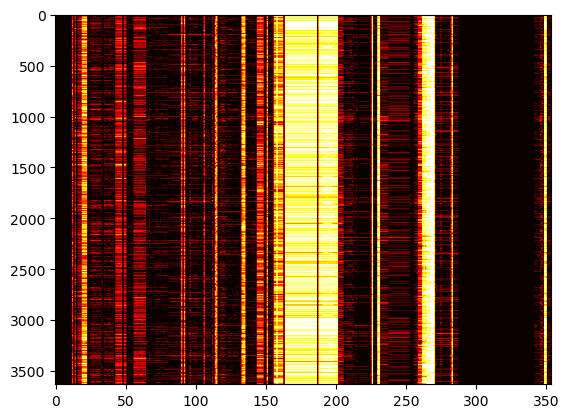

In [23]:
plt.imshow(hints.isnull(), cmap='hot', aspect='auto')
plt.show()

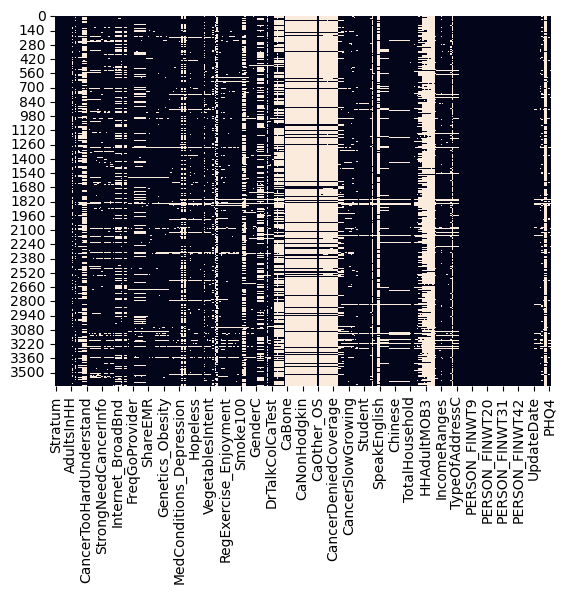

In [24]:
sns.heatmap(hints.isnull(), cbar=False)
plt.show()

In [25]:
print((hints.isna().sum()>=0).sum())

354


In [26]:
#x = (0,50,100,150,200,250,300)
x = np.arange(0,550,50)
y=[(hints.isna().sum()<=x[0]).sum()]
for i in np.arange(1,len(x),1):
  print(x[i])
  y.append((hints.isna().sum()<=x[i]).sum())

50
100
150
200
250
300
350
400
450
500


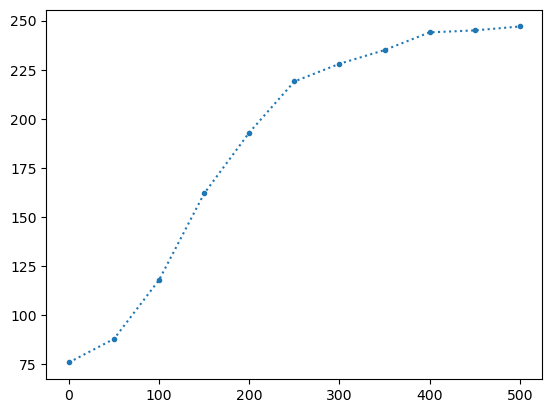

In [27]:
plt.plot(x, y, linestyle=':', marker='.')
plt.show()

In [28]:
hints.shape[0]

3630

In [29]:
print((hints.isna().sum()>=200).sum())

161


In [30]:
feature_to_keep = (hints.isna().sum()<=200)

In [31]:
type(feature_to_keep)

pandas.core.series.Series

In [32]:
feature_to_keep[feature_to_keep==True].index

Index(['Stratum', 'HIGHSPANLI', 'HISPSURNAME', 'HISP_HH', 'Treatment_C2',
       'RUC2003', 'CENSDIV', 'CENSREG', 'FormType', 'Language_Flag',
       ...
       'VAR_STRATUM', 'VAR_CLUSTER', 'UpdateDate', 'AgeGrpA', 'AgeGrpB',
       'EducA', 'EducB', 'BMI', 'smokeStat', 'IncomeRanges_IMP'],
      dtype='object', length=193)

In [33]:
hints_filtered = hints[feature_to_keep[feature_to_keep==True].index]

In [34]:
hints_filtered.shape

(3630, 193)

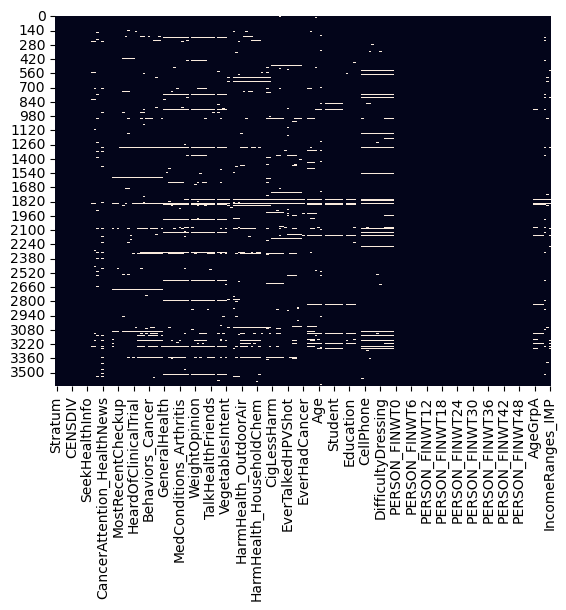

In [35]:
sns.heatmap(hints_filtered.isnull(), cbar=False)
plt.show()

In [36]:
hints_filtered.dropna().shape

(2078, 193)

In [37]:
hints_filtered.to_csv("hints_filtered.csv")